<a href="https://colab.research.google.com/github/Aneka16/10_InternetUsuageClustering_202401100300040/blob/main/10_InternetUsuageClustering_202401100300040.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


In [2]:

df = pd.read_csv("/content/internet_usage.csv")

# View first few rows
df.head()


,daily_usage_hours,site_categories_visited,sessions_per_day
0,9.884957,2,13
1,1.023220,9,1
2,10.394205,9,3
3,5.990237,6,16
4,3.558451,4,4


In [6]:
# Use relevant features
X = df[['daily_usage_hours', 'site_categories_visited', 'sessions_per_day' ]]
X_scaled = StandardScaler().fit_transform(X)


In [7]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)


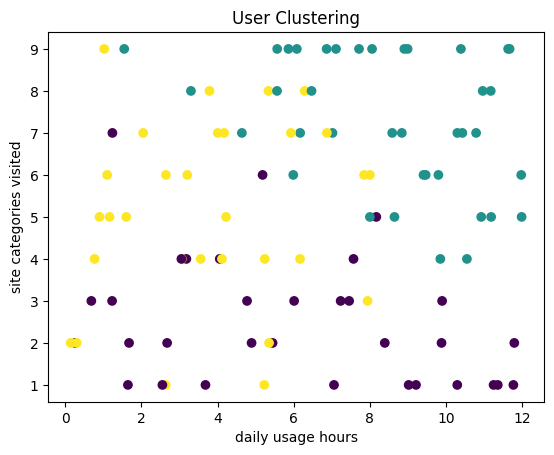

In [9]:
# Scatter plot of clusters
plt.scatter(df['daily_usage_hours'], df['site_categories_visited'], c=df['Cluster'])
plt.xlabel('daily usage hours')
plt.ylabel('site categories visited')
plt.title('User Clustering')
plt.show()


In [10]:
# If no labels exist, simulate them (for testing)
df['User_Type'] = np.random.choice([0, 1, 2], size=len(df))  # 0 = Light, 1 = Moderate, 2 = Heavy


In [15]:
# Train/Test split
X = df[['daily_usage_hours', 'site_categories_visited', 'sessions_per_day']]
y = df['User_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


              precision    recall  f1-score   support

           0       0.43      0.50      0.46         6
           1       0.25      0.17      0.20         6
           2       0.56      0.62      0.59         8

    accuracy                           0.45        20
   macro avg       0.41      0.43      0.42        20
weighted avg       0.43      0.45      0.43        20



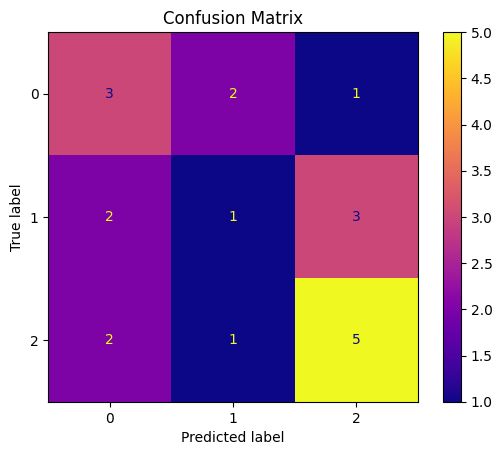

In [13]:
# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='plasma')
plt.title("Confusion Matrix")
plt.show()
